In [1]:
import numpy as  np
import pandas as pd
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score

# Práctica 5

**Integrantes**:
- Román Pardo Alejandro
- Riubi Zuñiga Andrey
- Salazar Vega Rodrigo
- Verduzco Lozano Iván Antonio

### Preprocesamiento de los datos

In [2]:
scaler = StandardScaler()

iris = pd.read_csv('./Datasets/iris.csv')
wine = pd.read_csv('./Datasets/wine.csv')

X_iris = iris.drop(['Species'], axis = 1)
y_iris = iris.Species.values

X_wine = wine.drop(['Target'], axis = 1)
y_wine = wine.Target.values
X_wine = scaler.fit_transform(X_wine)

### División de los datos

In [3]:
# División del dataset de Iris
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, 
    test_size= 0.3, 
    shuffle=True, 
    random_state=42
)

# División del dataset de llos vinos
x_wine_train, x_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, 
    test_size= 0.3, 
    shuffle=True, 
    random_state=42
)

### Entrenamiento del modelo y Validación

### Iris

0.9536363636363637


<function matplotlib.pyplot.show(close=None, block=None)>

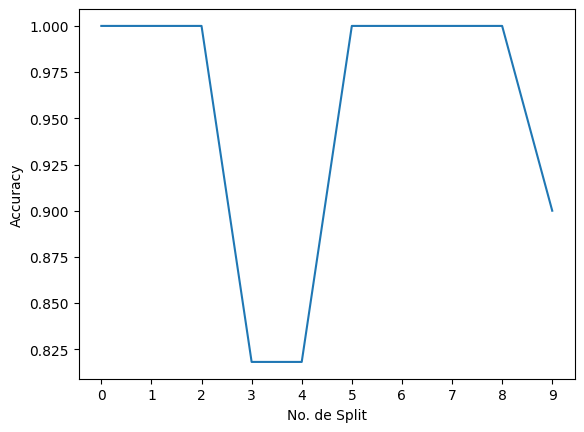

In [4]:
# Declaramos al modelo SVM clasificador
clf = svm.SVC()

# Cross validation
scores = cross_val_score(clf, x_iris_train, y_iris_train, cv=10)
print(np.mean(scores))

# scores de la validación
plt.plot(np.arange(len(scores)), scores)
plt.xticks([i for i in range(len(scores))])
plt.xlabel("No. de Split")
plt.ylabel("Accuracy")
plt.show

In [10]:
# Entrenamos el conjunto de entrenamiento
clf.fit(x_iris_train, y_iris_train)

# Predecimos el conjunto de test
y_iris_pred = clf.predict(x_iris_test)
i_a = accuracy_score(y_iris_pred, y_iris_test)
f1_score_iris = f1_score(y_iris_pred, y_iris_test, pos_label='positive',average='micro')
precision_iris = precision_score(y_iris_pred, y_iris_test, pos_label='positive', average='micro')
recall_iris = recall_score(y_iris_pred, y_iris_test, pos_label='positive', average='micro')

# Mostramos los resultados del modelo
print("Accuracy: ", i_a)
print('F1 Score : ', f1_score_iris)
print('Recall score : ', recall_iris)
print('Precision score ; ', precision_iris)


Accuracy:  1.0
F1 Score :  1.0
Recall score :  1.0
Precision score ;  1.0
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### Vinos

0.9756410256410255


<function matplotlib.pyplot.show(close=None, block=None)>

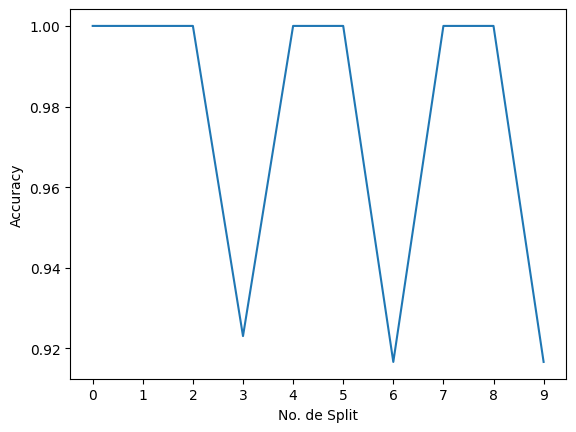

In [11]:
# Cross validation
scores = cross_val_score(clf, x_wine_train, y_wine_train, cv=10)
print(np.mean(scores))

plt.plot(np.arange(len(scores)), scores)
plt.xticks([i for i in range(len(scores))])
plt.xlabel("No. de Split")
plt.ylabel("Accuracy")
plt.show

In [15]:
# Entrenamiento del dataset del vino
clf.fit(x_wine_train, y_wine_train)

# Predecimos el conjunto de prueba
y_wine_pred = clf.predict(x_wine_test)
w_a = accuracy_score(y_wine_pred, y_wine_test)
f1_score_wine = f1_score(y_wine_pred, y_wine_test, pos_label='positive',average='micro')
precision_wine = precision_score(y_wine_pred, y_wine_test, pos_label='positive',average='micro')
recall_wine = recall_score(y_wine_pred, y_wine_test, pos_label='positive',average='micro')


# print("Accuracy: ", w_a)

# # Predecimos el conjunto de test
# y_iris_pred = clf.predict(x_iris_test)
# i_a = accuracy_score(y_iris_pred, y_iris_test)


# Mostramos los resultados del modelo
print("Accuracy: ", w_a)
print('F1 Score : ', f1_score_wine)
print('Recall score : ', recall_wine)
print('Precision score ; ', precision_wine)

Accuracy:  0.9814814814814815
F1 Score :  0.9814814814814815
Recall score :  0.9814814814814815
Precision score ;  0.9814814814814815
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### Resultados

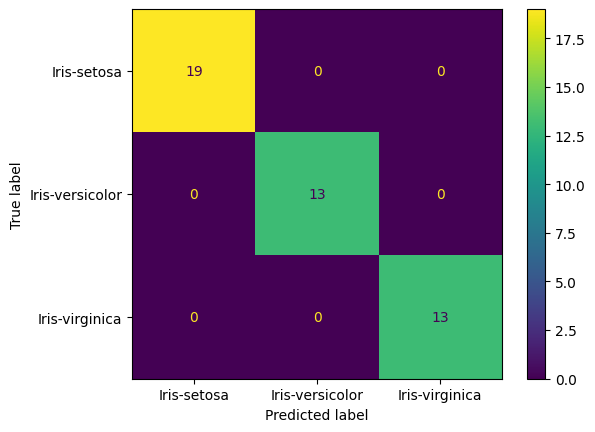

In [16]:
# Iris
cm = confusion_matrix(y_iris_test, y_iris_pred, labels=np.unique(y_iris))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_iris))
disp.plot()

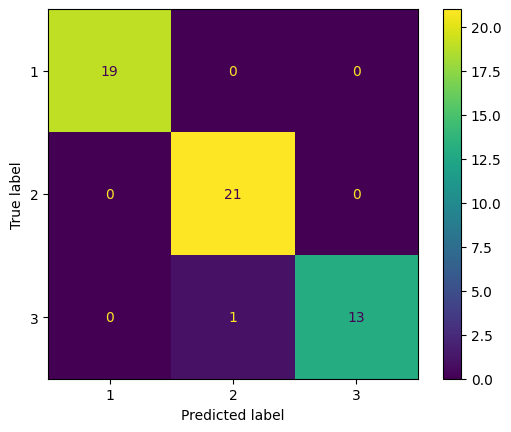

In [17]:
# Vinos
cm = confusion_matrix(y_wine_test, y_wine_pred, labels=np.unique(y_wine))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_wine))
disp.plot()

## Discusión

En conclusión, el método de máquinas de vectores de soporte es un método muy bueno para clasificar teniendo un accuracy promedio en el método de cross validation de $95\%$ y $97\%$ para iris y vinos respectivamente, mientras que en la anterior tarea que obtuvimos el accuracy con el *K-nn* y de $92\%$ para el dataset de iris y $71\%$ para el dataset de los vinos, usando K-Fold de 10 pliegues.

Para compensar y tener una mejor valoración de nuestro modelo en ambos dataset, recurrimos al uso de otras metricas como: **recall, precision y f1 score**.

Obteniendo unos resultaldos más que decentes, sobre todo en el dataset de Iris.

Mientras que para Iris usando todos los datos se obtuvo un accuracy del $100\%$ y el de vinos del $98\%$, esto se debe a que el método en si es mucho más complejo para calcular los vectores de soporte.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7c4b0dbe-cd7e-4104-91e5-9f2fe576b62b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>